# Sentiment Analysis on Movie Reviews

This project is an individual project. In this project, you are expected to solve the classification problem on movie reviews. Movie reviews have two different sentiments (positive or negative), please train machine learning or deep learning models to classify movie reviews into correct categories (1 for positive 1 and 0 for negative).

**NOTE:**
* Please solve the problems in this notebook using the dataset `IBDM Dataset.csv`.
* Important Dates: 
    * Project Start: Sep 22, Monday
    * Project Due: Oct 9, Thursday midnight

**HINT:**
* Here are some related tutorials that would be helpful:
    * https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/code
    * https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 

# Data Exploration
- Exploring the Dataset



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


First 5 rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

Missing values:
review       0
sentiment    0
dtype: int64

Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


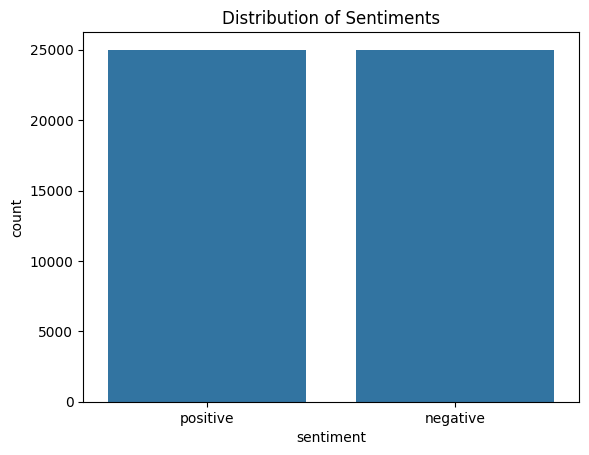

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

print('First 5 rows of the dataset:')
print(df.head())

print('\nDataset Info:')
df.info()

# Check for missing values
print('\nMissing values:')
print(df.isnull().sum())

# Sentiment distribution
print('\nSentiment Distribution:')
print(df['sentiment'].value_counts())

sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Data Preproccessing

In [ ]:
# Convert sentiment labels to numeric
# positive: 1
# negative: 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Initialize the stemmer and stop words list
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['processed_review'] = df['review'].apply(preprocess_text)

print('Sample of processed reviews:')
print(df[['review', 'processed_review']].head())

X = df['processed_review']
y = df['sentiment']

# Training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'\nTraining set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f'\nShape of TF-IDF training matrix: {X_train_tfidf.shape}')
print(f'Shape of TF-IDF testing matrix: {X_test_tfidf.shape}')

Sample of processed reviews:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                    processed_review  
0  one review mention watch oz episod hook right ...  
1  wonder littl product film techniqu unassum old...  
2  thought wonder way spend time hot summer weeke...  
3  basic famili littl boy jake think zombi closet...  
4  petter mattei love time money visual stun film...  

Training set size: 37500
Testing set size: 12500

Shape of TF-IDF training matrix: (37500, 5000)
Shape of TF-IDF testing matrix: (12500, 5000)


Word Cloud for Positive Reviews


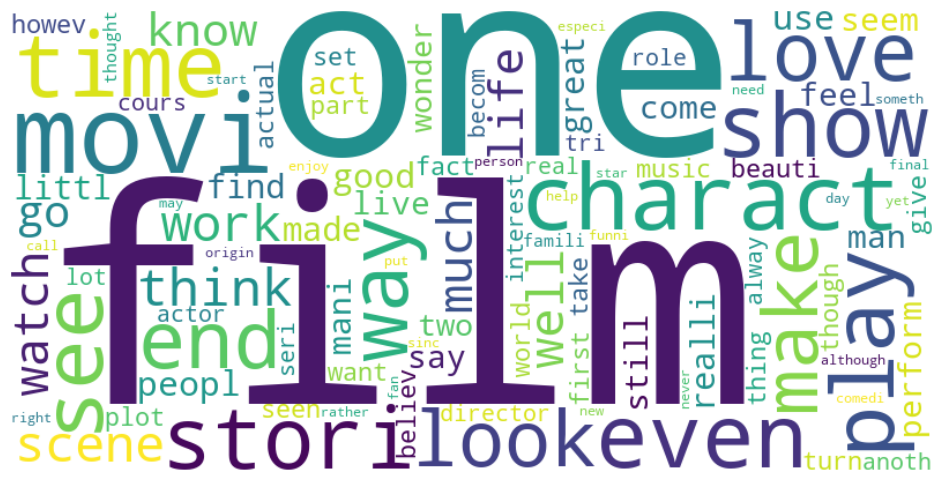


Word Cloud for Negative Reviews


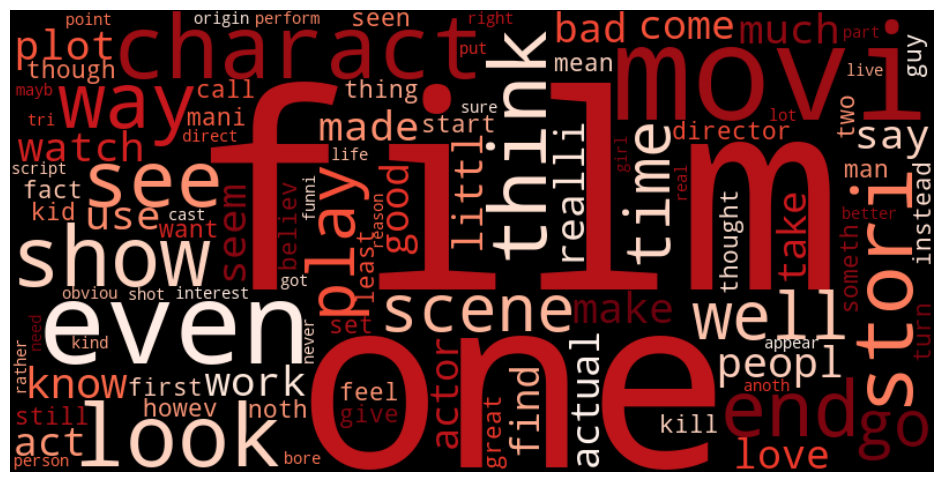

In [ ]:
positive_reviews = df[df['sentiment'] == 1]
negative_reviews = df[df['sentiment'] == 0]
positive_text = ' '.join(review for review in positive_reviews['processed_review'])
negative_text = ' '.join(review for review in negative_reviews['processed_review'])

# Generate Positive Word Cloud
wordcloud_positive = WordCloud(
    background_color='white',
    max_words=100,
    width=800,
    height=400,
    colormap='viridis'
).generate(positive_text)

print("Word Cloud for Positive Reviews")
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generate Negative Word Cloud
wordcloud_negative = WordCloud(
    background_color='black',
    max_words=100,
    width=800,
    height=400,
    colormap='Reds'
).generate(negative_text)

print("\nWord Cloud for Negative Reviews")
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Modelling

* Use the following models to classify the data:
    * Logistic Regression
    * LinearSVC
    * KNeighborsClassifier
    * Fully-connected layers, please try different number of hidden layers, different values of "hidden_layer_sizes" and "activation".


In [ ]:
results = {}

# 1. Logistic Regression
print('--- Training Logistic Regression ---')
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_preds)
results['Logistic Regression'] = lr_accuracy
print(f'Accuracy: {lr_accuracy:.4f}')
print(classification_report(y_test, lr_preds))

# 2. LinearSVC
print('\n--- Training LinearSVC ---')
svc_model = LinearSVC(random_state=42)
svc_model.fit(X_train_tfidf, y_train)
svc_preds = svc_model.predict(X_test_tfidf)
svc_accuracy = accuracy_score(y_test, svc_preds)
results['LinearSVC'] = svc_accuracy
print(f'Accuracy: {svc_accuracy:.4f}')
print(classification_report(y_test, svc_preds))

# 3. KNeighborsClassifier
print('\n--- Training KNeighborsClassifier ---')
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)
knn_preds = knn_model.predict(X_test_tfidf)
knn_accuracy = accuracy_score(y_test, knn_preds)
results['KNeighborsClassifier'] = knn_accuracy
print(f'Accuracy: {knn_accuracy:.4f}')
print(classification_report(y_test, knn_preds))

# 4. Fully-connected layers (MLPClassifier)
print('\n--- Training MLPClassifier (1 hidden layer, relu) ---')
mlp_model_1 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=300, random_state=42)
mlp_model_1.fit(X_train_tfidf, y_train)
mlp_preds_1 = mlp_model_1.predict(X_test_tfidf)
mlp_accuracy_1 = accuracy_score(y_test, mlp_preds_1)
results['MLP (100, relu)'] = mlp_accuracy_1
print(f'Accuracy: {mlp_accuracy_1:.4f}')
print(classification_report(y_test, mlp_preds_1))

print('\n--- Training MLPClassifier (2 hidden layers, relu) ---')
mlp_model_2 = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=300, random_state=42)
mlp_model_2.fit(X_train_tfidf, y_train)
mlp_preds_2 = mlp_model_2.predict(X_test_tfidf)
mlp_accuracy_2 = accuracy_score(y_test, mlp_preds_2)
results['MLP (100, 50, relu)'] = mlp_accuracy_2
print(f'Accuracy: {mlp_accuracy_2:.4f}')
print(classification_report(y_test, mlp_preds_2))

print('\n--- Training MLPClassifier (1 hidden layer, tanh) ---')
mlp_model_3 = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', max_iter=300, random_state=42)
mlp_model_3.fit(X_train_tfidf, y_train)
mlp_preds_3 = mlp_model_3.predict(X_test_tfidf)
mlp_accuracy_3 = accuracy_score(y_test, mlp_preds_3)
results['MLP (100, tanh)'] = mlp_accuracy_3
print(f'Accuracy: {mlp_accuracy_3:.4f}')
print(classification_report(y_test, mlp_preds_3))

--- Training Logistic Regression ---
Accuracy: 0.8852
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6157
           1       0.88      0.90      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500


--- Training LinearSVC ---
Accuracy: 0.8804
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6157
           1       0.88      0.89      0.88      6343

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500


--- Training KNeighborsClassifier ---
Accuracy: 0.7605
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      6157
           1       0.73      0.83      0.78      6343

    accuracy               

# Results
- Summarize and visualize the results discovered from the analysis
- Use figures or tables to present the results.

--- Model Performance Summary ---
                  Model  Accuracy
0   Logistic Regression   0.88520
1             LinearSVC   0.88040
4   MLP (100, 50, relu)   0.86976
3       MLP (100, relu)   0.86904
5       MLP (100, tanh)   0.86608
2  KNeighborsClassifier   0.76048


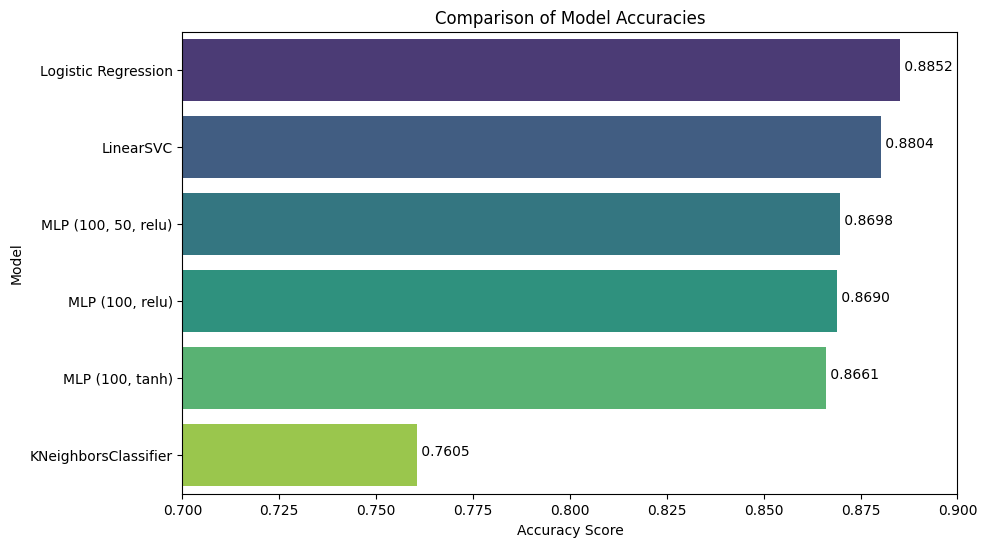

In [ ]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print('--- Model Performance Summary ---')
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, hue='Model', palette='viridis', legend=False)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.xlim(0.7, 0.9)

for index, value in enumerate(results_df['Accuracy']):
    plt.text(value, index, f' {value:.4f}')

plt.show()

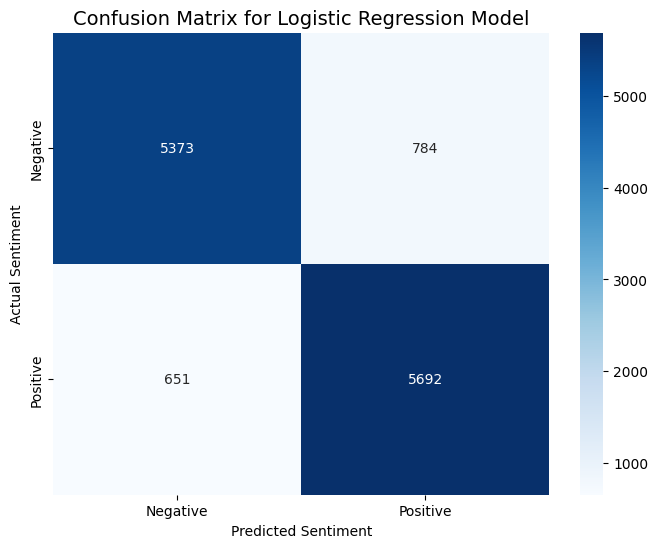

In [ ]:
# Compute the confusion matrix for the best model
cm = confusion_matrix(y_test, lr_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Negative', 'Positive'], 
    yticklabels=['Negative', 'Positive']
)

plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.title('Confusion Matrix for Logistic Regression Model', size=14)

plt.show()